# Example: In-training validation
---------------------------------

This example shows how to keep track of the model's performance during training.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
# Initialize atom
atom = ATOMClassifier(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Train set size: 456
Test set size: 113
-------------------------------------
Memory: 141.24 kB
Scaled: False
Outlier values: 167 (1.2%)



In [4]:
# Not all models support in-training validation
# You can chek which ones do using the available_models method
atom.available_models(validation=True)

acronym                   fullname                    estimator  \
0    CatB                   CatBoost           CatBoostClassifier   
1     LGB                   LightGBM               LGBMClassifier   
2     MLP       MultiLayerPerceptron                MLPClassifier   
3      PA          PassiveAggressive  PassiveAggressiveClassifier   
4    Perc                 Perceptron                   Perceptron   
5     SGD  StochasticGradientDescent                SGDClassifier   
6     XGB                    XGBoost                XGBClassifier   

                                          module  handles_missing  \
0                                  catboost.core             True   
1                               lightgbm.sklearn             True   
2  sklearn.neural_network._multilayer_perceptron            False   
3       sklearn.linear_model._passive_aggressive            False   
4               sklearn.linear_model._perceptron            False   
5      sklearn.linear_model._stochastic_gradient            False   
6                                xgboost.sklearn             True   

   needs_scaling  accepts_sparse  native_multilabel  native_multioutput  \
0           True            True              False               False   
1           True            True              False               False   
2           True            True               True               False   
3           True            True              False               False   
4           True           False              False               False   
5           True            True              False               False   
6           True            True              False               False   

     validation supports_engines  
0  n_estimators         catboost  
1  n_estimators         lightgbm  
2      max_iter          sklearn  
3      max_iter          sklearn  
4      max_iter          sklearn  
5      max_iter          sklearn  
6  n_estimators          xgboost

In [5]:
# Run the models normally
atom.run(models=["MLP", "LGB"], metric="auc")


Training ========================= >>
Models: MLP, LGB
Metric: auc


Results for MultiLayerPerceptron:
Fit ---------------------------------------------
Train evaluation --> auc: 0.9997
Test evaluation --> auc: 0.9936
Time elapsed: 1.825s
-------------------------------------------------
Time: 1.825s


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> auc: 1.0
Test evaluation --> auc: 0.9775
Time elapsed: 0.417s
-------------------------------------------------
Time: 0.417s


Final results ==================== >>
Total time: 2.246s
-------------------------------------
MultiLayerPerceptron --> auc: 0.9936 !
LightGBM             --> auc: 0.9775


## Analyze the results

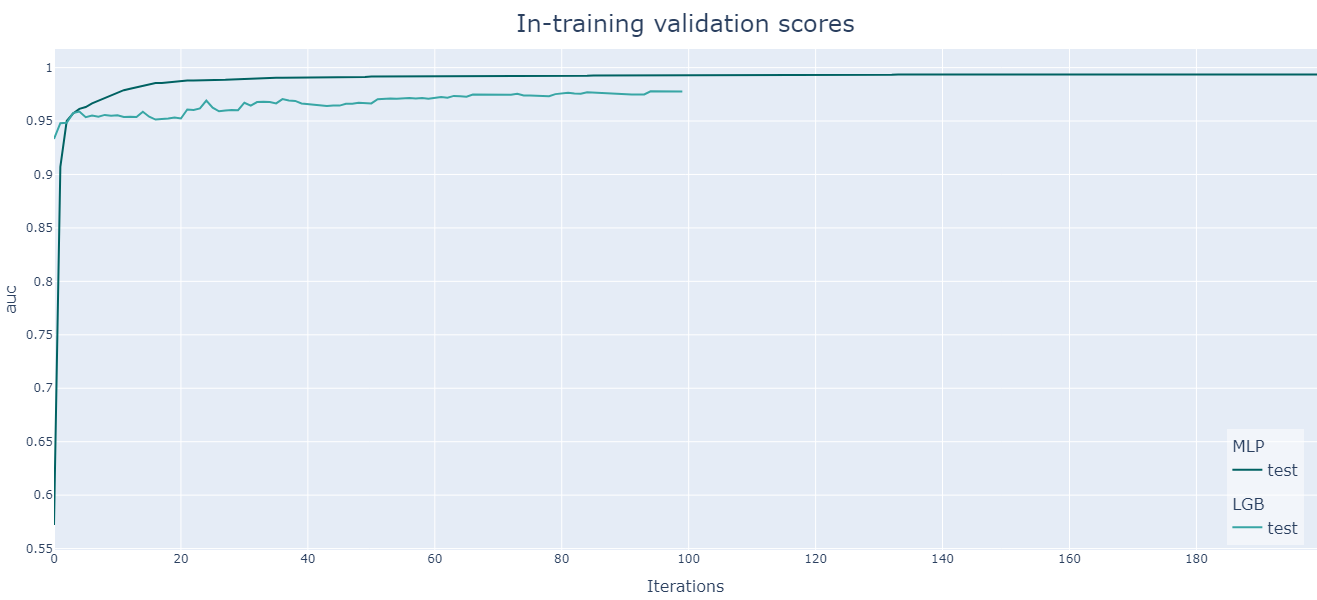

In [6]:
atom.plot_evals(title="In-training validation scores")

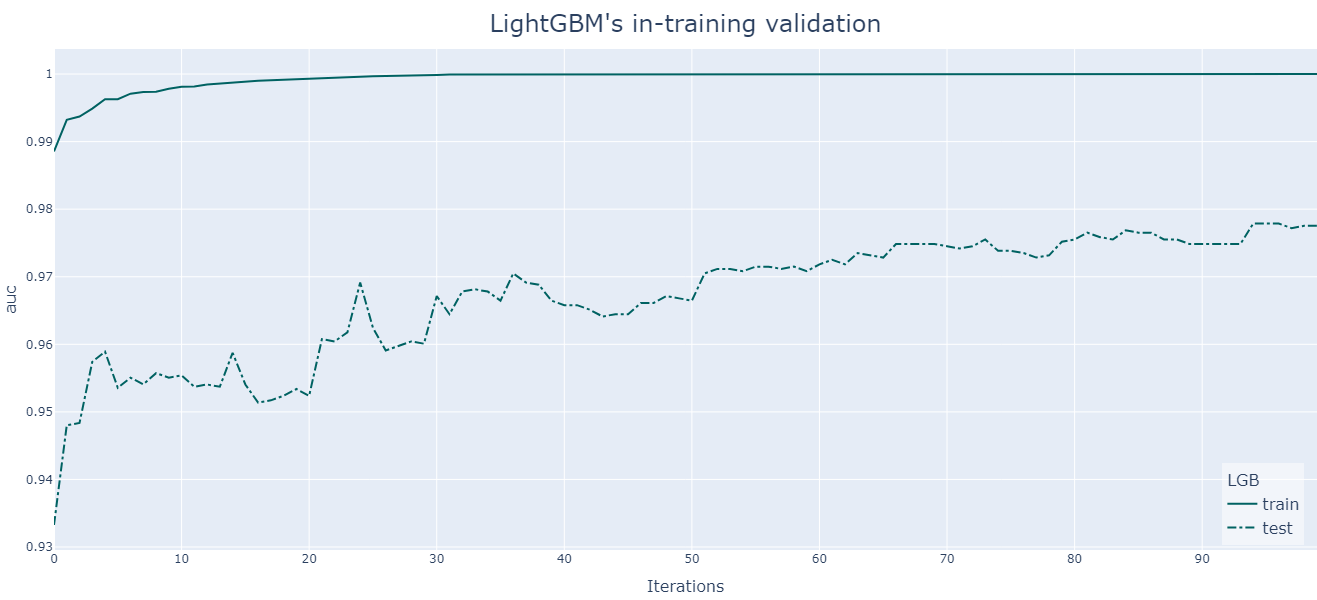

In [7]:
# Plot the validation on the train and test set
atom.lgb.plot_evals(dataset="train+test", title="LightGBM's in-training validation")